In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn import svm
from sklearn import metrics
import joblib
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
dataframe = pd.read_csv("Downloads\Mark1.csv")

In [3]:
dataframe.head()

,stomach_pain,vomiting,weight_loss,cough,breathlessness,chest_pain,continuous_feel_of_urine,fatigue,blurred_and_distorted_vision,back_pain,headache,acidity,outcome
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
dataframe.shape

(349, 13)

In [5]:
dataframe.describe()

,stomach_pain,vomiting,weight_loss,cough,breathlessness,chest_pain,continuous_feel_of_urine,fatigue,blurred_and_distorted_vision,back_pain,headache,acidity,outcome
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.0,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,0.048711,0.401146,0.100287,0.126074,0.100287,0.160458,0.0,0.435530,0.077364,0.051576,0.229226,0.048711,0.435530
std,0.215571,0.490834,0.300813,0.332410,0.300813,0.367558,0.0,0.496538,0.267552,0.221487,0.420939,0.215571,0.496538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


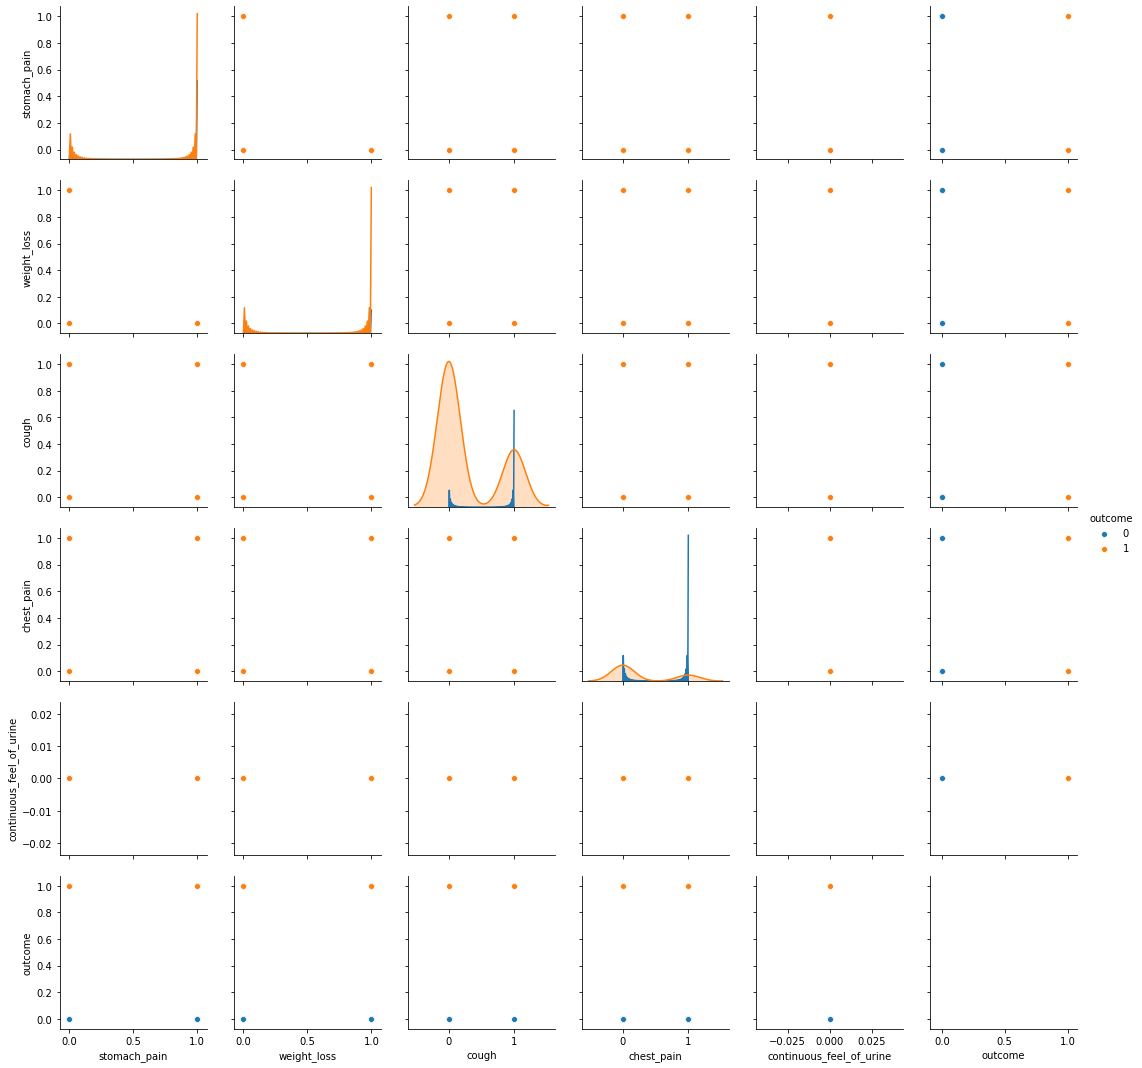

In [6]:
sns.pairplot(dataframe[['stomach_pain','weight_loss','cough','chest_pain','continuous_feel_of_urine','outcome']],hue='outcome')

In [7]:
train=dataframe.drop('outcome',axis=1)
train.head()

,stomach_pain,vomiting,weight_loss,cough,breathlessness,chest_pain,continuous_feel_of_urine,fatigue,blurred_and_distorted_vision,back_pain,headache,acidity
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
outcome=dataframe.outcome
outcome.head()

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(train,outcome, test_size=0.2, random_state=0)
print("X_train size  ==>", X_train.shape)
print("X_test size  ==>", X_test.shape)
print("Y_train size  ==>", Y_train.shape)
print("Y_test size  ==>", Y_test.shape)

X_train size  ==> (279, 12)
X_test size  ==> (70, 12)
Y_train size  ==> (279,)
Y_test size  ==> (70,)


In [10]:
clf1=svm.SVC(kernel='linear')
clf1.fit(X_train,Y_train)
Y_pred=clf1.predict(X_test)

In [11]:
print("Accuracy:" ,metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))

Accuracy: 0.8571428571428571
Precision: 0.9444444444444444


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
print("Accuracy:" ,metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))

Accuracy: 0.8428571428571429
Precision: 0.7777777777777778


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
Y_pred = classifier.predict(X_test)

In [18]:
print("Accuracy:" ,metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))

Accuracy: 0.8714285714285714
Precision: 0.8148148148148148


In [19]:
import pickle

In [20]:
with open('mark350_pickle','wb') as f:
    pickle.dump(clf1,f)

In [21]:
with open('mark350_pickle','rb') as f:
    mp = pickle.load(f)

In [22]:
mp.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)